# Classic Models - V3

Base de dados de uma companhia de venda de modelos escala de veículos (carros, trenes, aeronaves, etc)

## Introdução

### Modelo de dados <a id='modelo-de-dados'></a>

<img src='./../../docs/imgs/classicmodels.png' alt="Modelo de dados" />


### Tabelas


#### Pedidos
A tabela orders concentra cada pedido (_orders_) realizado por um cliente, sua data e status e está associada aos itens do pedido (_ordersdetails_) que traz informações dos produtos que foram vendidos, sua quantidade e preço unitário. 

#### Clientes
A tabela _customers_ informa os detalhes do cliente, dos quais se destacam a localização e os pagamentos realizados.

#### Empregados

A tabela 'employees' contem a função (cargo) do empregado e a sua depenência hierárquica; com essa informação é possível estabelecer quais os vendedores (_Sales Rep_) dependem que qual gerente (_Sales Manager_) que por usa vez estão relacionados aos territorios (*)

#### Filiais 

A tabela _offices_ traz informações de localização [cidades, estados, países e territorios (*)]

(*) Os territorios estão dividios em:  
* NA = América do Norte
* EMEA = Europa, Oriente Médio e África
* APAC = Asia-Pacífico
* Japan = Japão


## Configurações

### Imports

In [276]:
import pandas as pd
from sqlalchemy import create_engine,text
from sqlalchemy.engine.url import URL
import matplotlib.pyplot as plt 
import seaborn as sns

### Configurações do script

In [277]:
# Seaborn styles

# Possibilidades de estilos Seaborn
DARKGRID = "darkgrid"
WHITEGRID = "whitegrid"
sns.set_style(DARKGRID)

# Tamanho padrão das figuras
FIGSIZE_DEFAULT = (12, 8)

# Meses do ano em idioma português
meses_pt = ["janeiro", "fevereiro", "março", "abril", "maio", \
            "junho", "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"]

# Configuração de conexão à base de daddos
usuario = 'root'
senha = 'secret'

engine = create_engine(URL(
    drivername = 'mysql+pymysql',
    username = usuario,
    password = senha,
    
    host = 'localhost',
    query = {'charset': 'utf8'},
    port = 3306, 
    database='classicmodels'
))


# Função de consulta
def query(q_):
    try:
        # Conexão à base de dados
        conn = engine.connect()
        
        # Consulta
        result = pd.read_sql(text(q_), conn)
        
        # Display informações básicas do resultado 
        display(result.shape, result.head()) 
        
        # Fechamento da conexão
        conn.close()
        return result
    except:
        return None

### Metadados das tabelas

Consulta de todas as tabelas da base e dados e apresentação dos metadados

In [278]:
tables = query('show tables')

for table in tables.values:
    print(f'\nDetalhes da tabela: << {table[0].upper()} >>\n')
    query(f'show columns from {table[0]}')
    print('\n= = = = = = = = = = = = = = = = = = = = = = = = = = ')

(8, 1)

,Tables_in_classicmodels
0,customers
1,employees
2,offices
3,orderdetails
4,orders



Detalhes da tabela: << CUSTOMERS >>



(13, 6)

,Field,Type,Null,Key,Default,Extra
0,customerNumber,int,NO,PRI,None,
1,customerName,varchar(50),NO,,None,
2,contactLastName,varchar(50),NO,,None,
3,contactFirstName,varchar(50),NO,,None,
4,phone,varchar(50),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << EMPLOYEES >>



(8, 6)

,Field,Type,Null,Key,Default,Extra
0,employeeNumber,int,NO,PRI,None,
1,lastName,varchar(50),NO,,None,
2,firstName,varchar(50),NO,,None,
3,extension,varchar(10),NO,,None,
4,email,varchar(100),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << OFFICES >>



(9, 6)

,Field,Type,Null,Key,Default,Extra
0,officeCode,varchar(10),NO,PRI,None,
1,city,varchar(50),NO,,None,
2,phone,varchar(50),NO,,None,
3,addressLine1,varchar(50),NO,,None,
4,addressLine2,varchar(50),YES,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << ORDERDETAILS >>



(5, 6)

,Field,Type,Null,Key,Default,Extra
0,orderNumber,int,NO,PRI,None,
1,productCode,varchar(15),NO,PRI,None,
2,quantityOrdered,int,NO,,None,
3,priceEach,"decimal(10,2)",NO,,None,
4,orderLineNumber,smallint,NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << ORDERS >>



(7, 6)

,Field,Type,Null,Key,Default,Extra
0,orderNumber,int,NO,PRI,None,
1,orderDate,date,NO,,None,
2,requiredDate,date,NO,,None,
3,shippedDate,date,YES,,None,
4,status,varchar(15),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << PAYMENTS >>



(4, 6)

,Field,Type,Null,Key,Default,Extra
0,customerNumber,int,NO,PRI,None,
1,checkNumber,varchar(50),NO,PRI,None,
2,paymentDate,date,NO,,None,
3,amount,"decimal(10,2)",NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << PRODUCTLINES >>



(4, 6)

,Field,Type,Null,Key,Default,Extra
0,productLine,varchar(50),NO,PRI,None,
1,textDescription,varchar(4000),YES,,None,
2,htmlDescription,mediumtext,YES,,None,
3,image,mediumblob,YES,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << PRODUCTS >>



(9, 6)

,Field,Type,Null,Key,Default,Extra
0,productCode,varchar(15),NO,PRI,None,
1,productName,varchar(70),NO,,None,
2,productLine,varchar(50),NO,MUL,None,
3,productScale,varchar(10),NO,,None,
4,productVendor,varchar(50),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 


## Vendas por clientes

Utilizado o critério de pagamentos realizados por períodos (e total) por cada cliente

In [279]:
q = '''
SELECT c.customerName,
	p.paymentDate, p.amount
	-- clientes
    from customers c
    -- pagamentos
	join payments p on p.customerNumber = c.customerNumber
	order by p.paymentDate ASC 
'''

df1 = query(q)

(273, 3)

,customerName,paymentDate,amount
0,Online Diecast Creations Co.,2003-01-16,10223.83
1,"Blauer See Auto, Co.",2003-01-28,10549.01
2,Vitachrome Inc.,2003-01-30,5494.78
3,Baane Mini Imports,2003-02-16,50218.95
4,Danish Wholesale Imports,2003-02-20,53959.21


### Clientes com maior e menor volume de vendas

In [280]:
agg_vendas = df1.groupby('customerName')['amount'].sum().sort_values(ascending=False).reset_index()
head10 = agg_vendas.head(10)
tail10 = agg_vendas.tail(10)

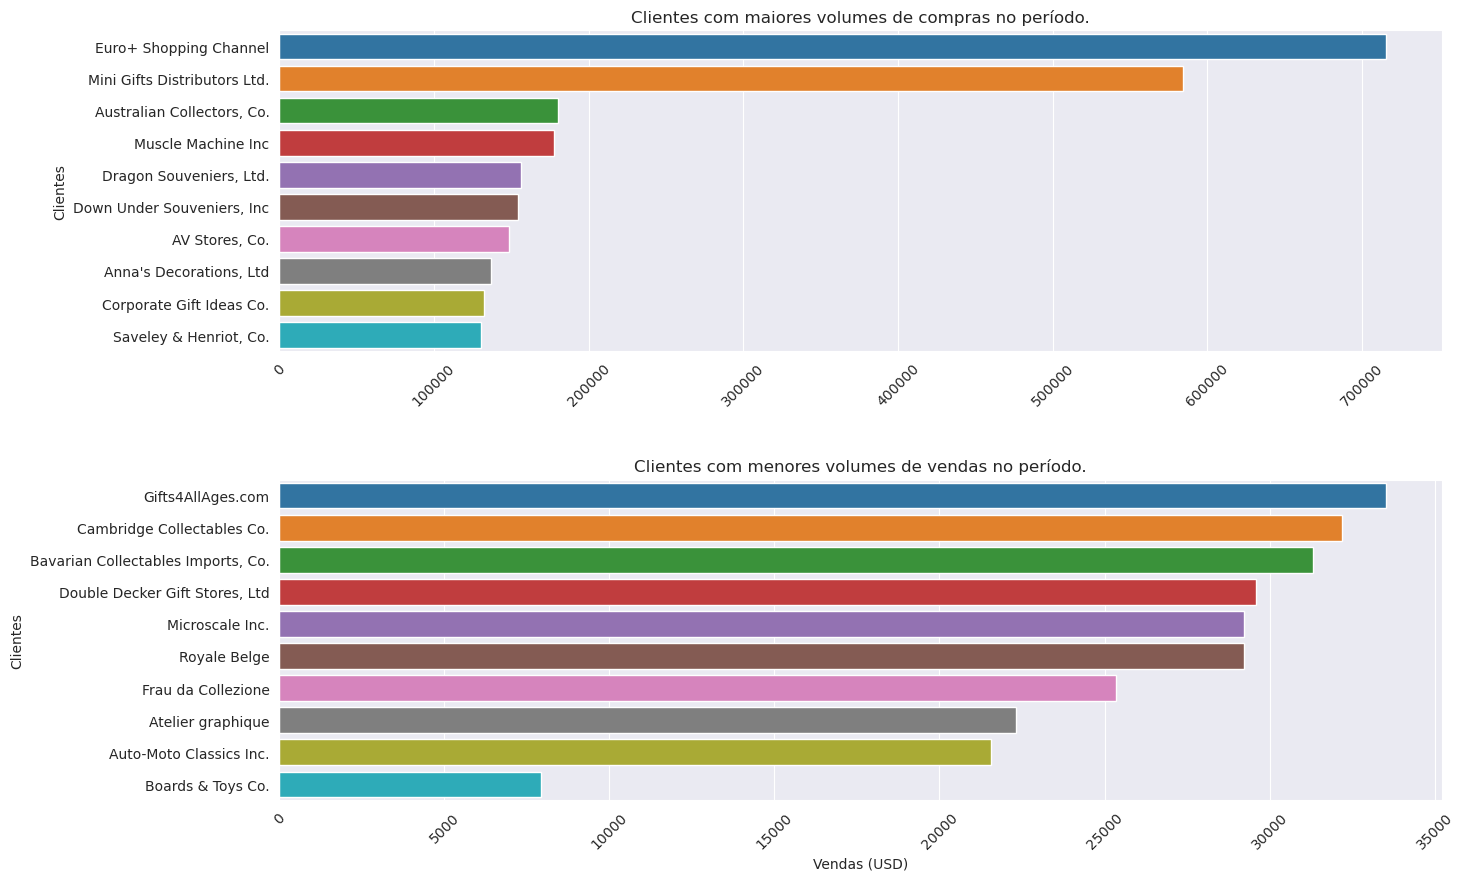

In [281]:
# Plot utilizando subplots
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 1, 1)
sns.barplot(data=head10, y='customerName', x='amount', orient='h')
plt.xlabel(None)
plt.ylabel('Clientes')
plt.title('Clientes com maiores volumes de compras no período.')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(data=tail10, y='customerName', x='amount', orient='h')
plt.xlabel('Vendas (USD)')
plt.ylabel('Clientes')
plt.title('Clientes com menores volumes de vendas no período.')
plt.xticks(rotation=45)

plt.show()

In [282]:
# Função de plotagem
def build_barplot_chart(df_, title_):
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_, y='customerName', x='amount', orient='h')
    plt.xlabel('Vendas (USD)')
    plt.ylabel('Clientes')
    plt.title(title_)
    plt.xticks(rotation=45)
    plt.show()

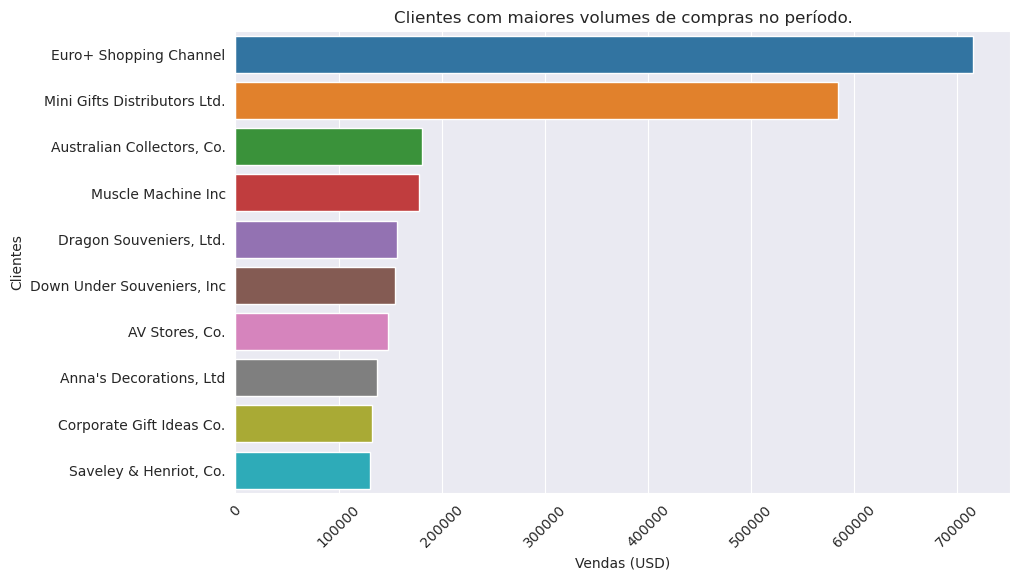

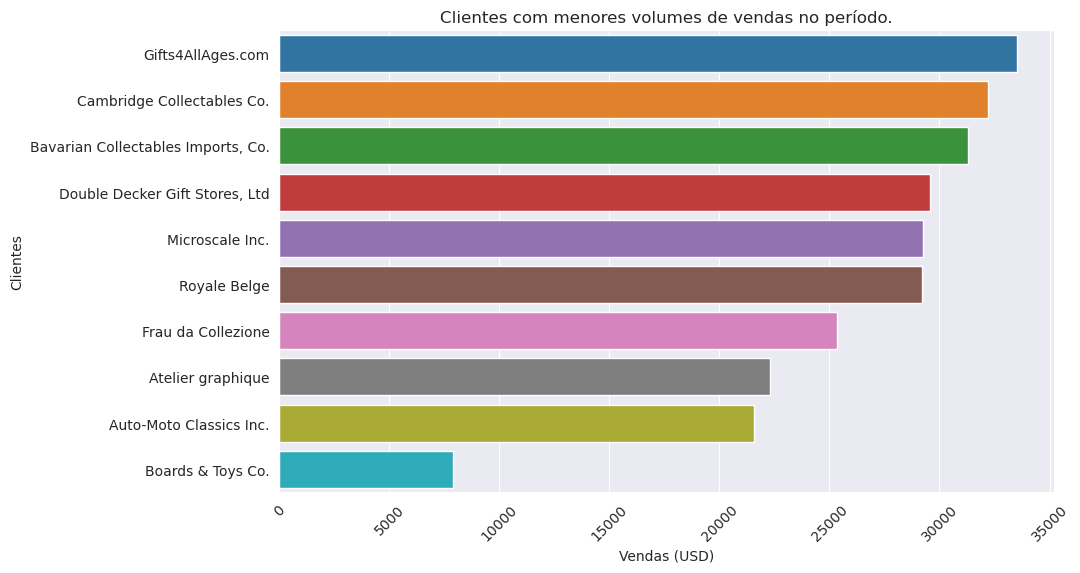

In [283]:
build_barplot_chart(head10, 'Clientes com maiores volumes de compras no período.')
build_barplot_chart(tail10, 'Clientes com menores volumes de vendas no período.')

## Vendas por categorias e produtos

In [284]:
# Consulta de pedidos, produtos e categorias
df2 = query('''
-- by products and categories
SELECT o.orderDate, o.orderNumber, p.productName, o2.quantityOrdered, o2.priceEach,  
	(o2.quantityOrdered * o2.priceEach) as totalLine, p2.productLine 
	from orders o 
	join orderdetails o2 on o2.orderNumber = o.orderNumber 
	join products p on p.productCode = o2.productCode 
	join productlines p2 on p2.productLine = p.productLine
    WHERE status = "Shipped" ''')

df2['orderDate'] = df2['orderDate'].astype('datetime64[ms]')

(2771, 7)

,orderDate,orderNumber,productName,quantityOrdered,priceEach,totalLine,productLine
0,2003-01-06,10100,1917 Grand Touring Sedan,30,136.00,4080.00,Vintage Cars
1,2003-01-06,10100,1911 Ford Town Car,50,55.09,2754.50,Vintage Cars
2,2003-01-06,10100,1932 Alfa Romeo 8C2300 Spider Sport,22,75.46,1660.12,Vintage Cars
3,2003-01-06,10100,1936 Mercedes Benz 500k Roadster,49,35.29,1729.21,Vintage Cars
4,2003-01-09,10101,1932 Model A Ford J-Coupe,25,108.06,2701.50,Vintage Cars


In [285]:
# categorias por volume (unidades vendidas)
categorias_por_unidades_vendidas = df2.groupby('productLine')['quantityOrdered'] \
    .agg(['sum', 'mean']).reset_index().sort_values(by='sum', ascending=False)

display(categorias_por_unidades_vendidas.shape, categorias_por_unidades_vendidas)

(7, 3)

,productLine,sum,mean
0,Classic Cars,33349,35.030462
6,Vintage Cars,21015,34.793046
1,Motorcycles,12425,35.398860
2,Planes,10337,35.040678
5,Trucks and Buses,10233,35.531250
3,Ships,7131,34.785366
4,Trains,2651,34.881579


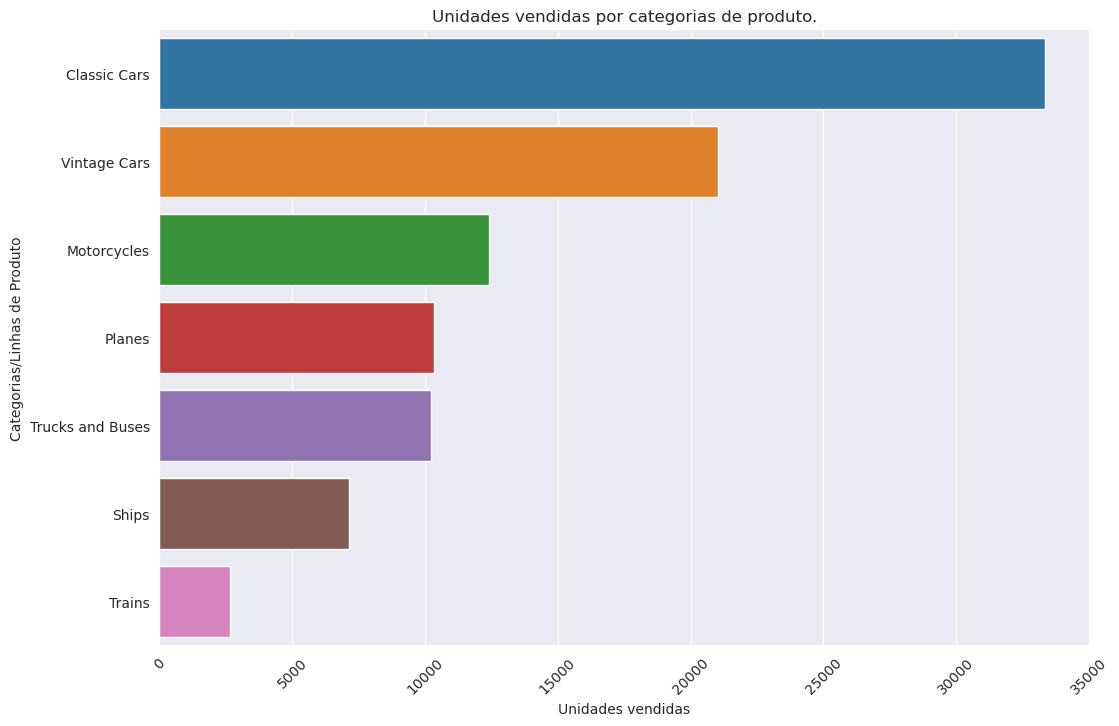

In [286]:
# Plotagem de unidades vendidas por 
plt.figure(figsize=FIGSIZE_DEFAULT)
sns.barplot(data=categorias_por_unidades_vendidas, y='productLine', x='sum', orient='h')
plt.xlabel('Unidades vendidas')
plt.ylabel('Categorias/Linhas de Produto')
plt.title('Unidades vendidas por categorias de produto.')
plt.xticks(rotation=45)
plt.show()

In [287]:
# Categorias por valores 
categorias_por_volume_vendas = df2.groupby('productLine')['totalLine'] \
    .agg(['sum', 'mean']).reset_index().sort_values(by='sum', ascending=False)

categorias_por_volume_vendas

,productLine,sum,mean
0,Classic Cars,3623600.63,3806.303183
6,Vintage Cars,1643172.49,2720.484255
1,Motorcycles,1084927.13,3090.960484
5,Trucks and Buses,949004.34,3295.153958
2,Planes,832730.27,2822.814475
3,Ships,556629.01,2715.263463
4,Trains,175030.77,2303.036447


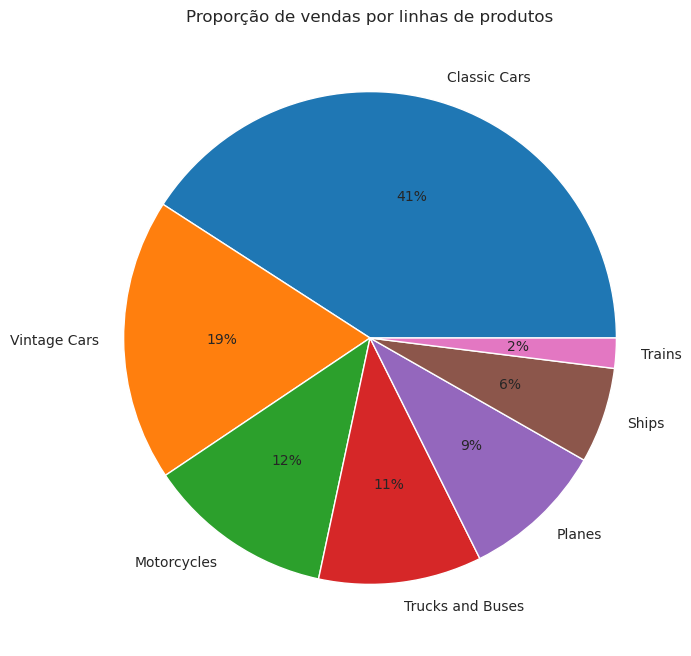

In [288]:
# Distribuição das vendas por linhas de produtos
plt.figure(figsize=FIGSIZE_DEFAULT)
plt.pie(x=categorias_por_volume_vendas['sum'], \
        labels=categorias_por_volume_vendas['productLine'], \
        autopct='%.0f%%')
plt.title('Proporção de vendas por linhas de produtos')
plt.show()

### Vendas por produtos - Unidades vendidas

In [289]:
# Produtos por unidades vendidas
produtos_por_unidades = df2.groupby('productName')['quantityOrdered'] \
    .agg(['sum', 'mean']) \
    .reset_index() \
    .sort_values('sum', ascending=False)

prod_head10 = produtos_por_unidades.head(10)

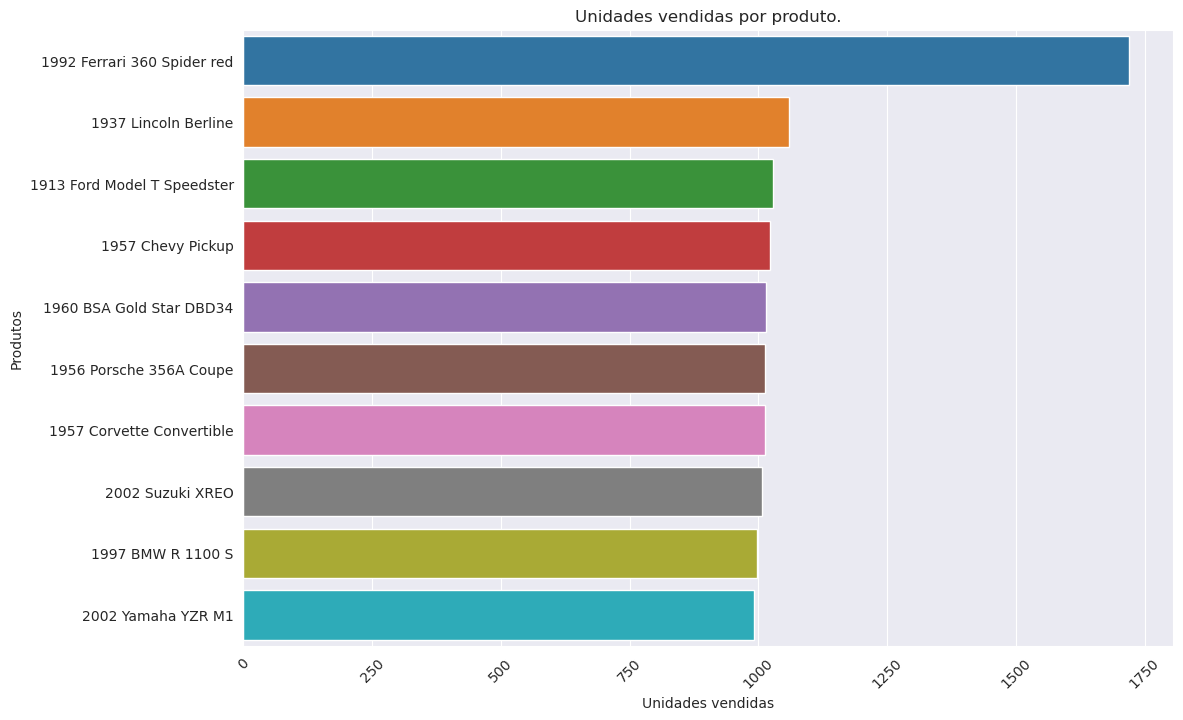

In [290]:
# Unidades vendidas por produtos
plt.figure(figsize=FIGSIZE_DEFAULT)
sns.barplot(data=prod_head10, y='productName', x='sum', orient='h')
plt.xlabel('Unidades vendidas')
plt.ylabel('Produtos')
plt.title('Unidades vendidas por produto.')
plt.xticks(rotation=45)
plt.show()

### Vendas por produtos (USD)

In [291]:
# Produtos por volume de vendas (USD)
produtos_usd = df2.groupby('productName')['totalLine'] \
    .agg(['sum', 'mean']) \
    .reset_index() \
    .sort_values('sum', ascending=False)

prod_head10 = produtos_usd.head(10)

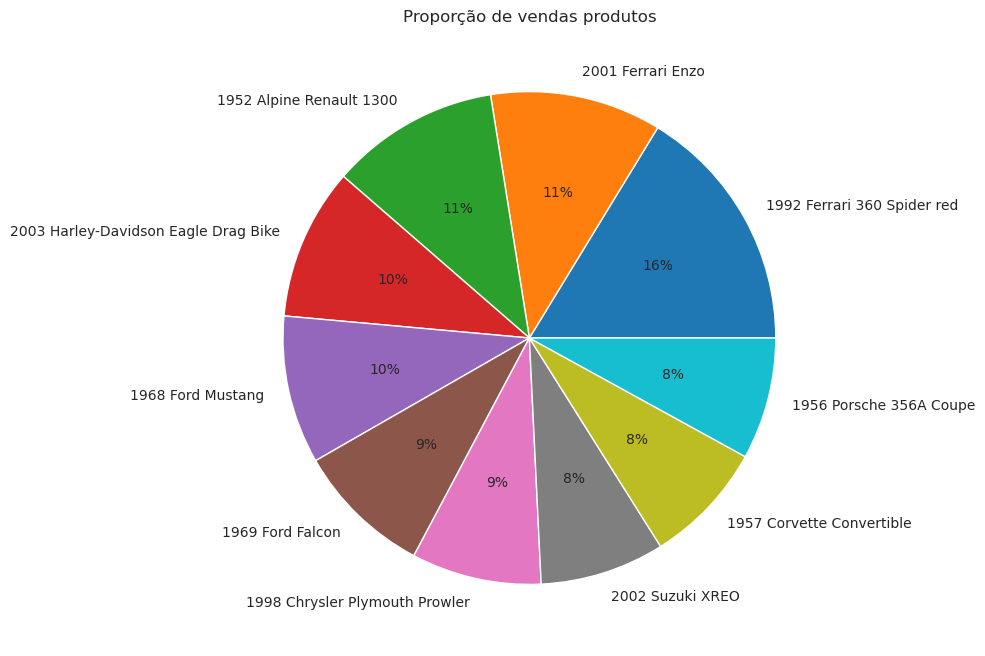

In [292]:
# Proporção de vendas por produtos
plt.figure(figsize=FIGSIZE_DEFAULT)
plt.pie(x=prod_head10['sum'], \
        labels=prod_head10['productName'], \
        autopct='%.0f%%')
plt.title('Proporção de vendas produtos')
plt.show()

## Vendas por períodos

In [293]:
# Anos, meses e períodos
df2['year'] = df2.orderDate.dt.year
df2['month'] = df2.orderDate.dt.month
df2['ordersPeriod'] = df2['orderDate'].dt.strftime('%Y-%m')
df2.sample(10)

,orderDate,orderNumber,productName,quantityOrdered,priceEach,totalLine,productLine,year,month,ordersPeriod
1353,2004-05-26,10252,1969 Dodge Super Bee,20,74.78,1495.60,Classic Cars,2004,5,2004-05
1467,2004-07-19,10270,1962 LanciaA Delta 16V,32,124.10,3971.20,Classic Cars,2004,7,2004-07
1238,2004-04-02,10235,P-51-D Mustang,24,81.95,1966.80,Planes,2004,4,2004-04
432,2003-09-11,10148,1948 Porsche Type 356 Roadster,28,135.63,3797.64,Classic Cars,2003,9,2003-09
2757,2005-05-17,10419,1968 Ford Mustang,12,182.90,2194.80,Classic Cars,2005,5,2005-05
2377,2005-01-06,10363,1968 Dodge Charger,34,106.87,3633.58,Classic Cars,2005,1,2005-01
914,2003-12-01,10200,P-51-D Mustang,28,74.34,2081.52,Planes,2003,12,2003-12
2431,2005-01-23,10371,1982 Camaro Z28,34,83.95,2854.30,Classic Cars,2005,1,2005-01
240,2003-05-28,10126,1939 Cadillac Limousine,43,47.29,2033.47,Vintage Cars,2003,5,2003-05
1106,2004-02-12,10220,Diamond T620 Semi-Skirted Tanker,37,92.60,3426.20,Trucks and Buses,2004,2,2004-02


In [294]:
# Calcular o acumulado dos meses
vendas_por_meses = df2.groupby('month')['totalLine'] \
    .sum().sort_index().reset_index().iloc[:24]

vendas_por_meses['month_name'] = meses_pt
vendas_por_meses

,month,totalLine,month_name
0,1,677234.40,janeiro
1,2,735098.65,fevereiro
2,3,690951.84,março
3,4,600851.77,abril
4,5,602192.05,maio
5,6,363563.23,junho
6,7,527503.85,julho
7,8,597584.20,agosto
8,9,520497.65,setembro
9,10,943281.08,outubro


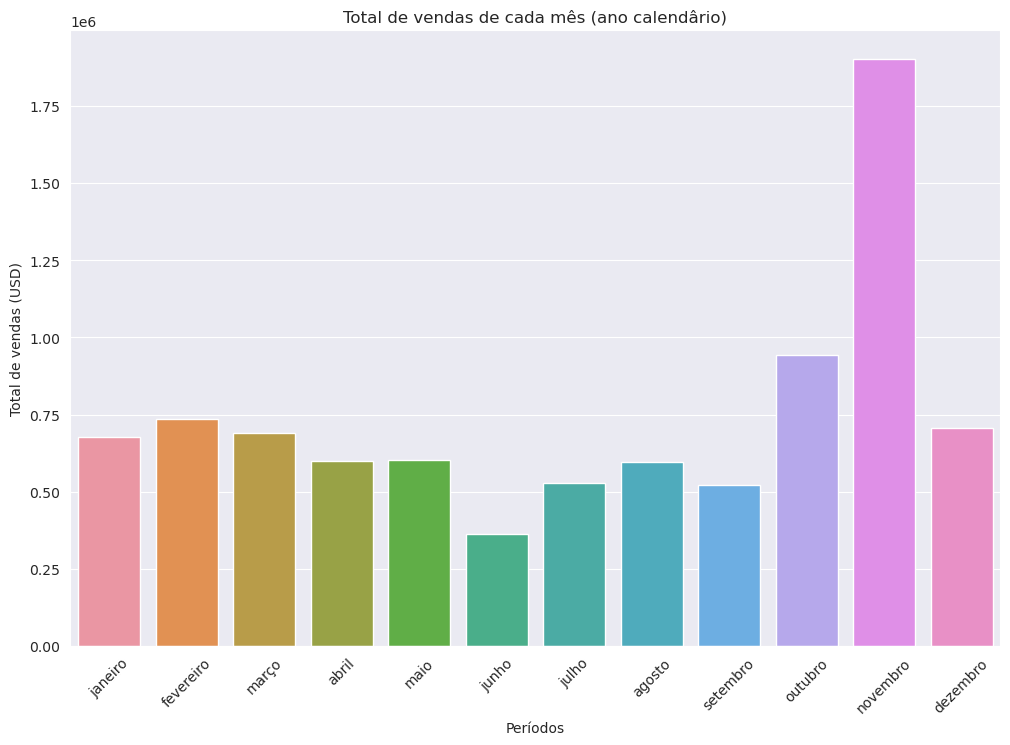

In [295]:
# Vendas por mês (ano calendârio)
plt.figure(figsize=FIGSIZE_DEFAULT)
sns.barplot(data=vendas_por_meses, x=vendas_por_meses['month_name'], y=vendas_por_meses['totalLine'])
plt.title("Total de vendas de cada mês (ano calendârio)")
plt.xticks(rotation=45)
plt.xlabel("Períodos")
plt.ylabel("Total de vendas (USD)")
plt.show()

### Differência ano a ano (por mês)

In [296]:
# Agrgegar por períodos (total vendas) e cortar o ano 2005 que não está completo
vendas_por_periodos = df2.groupby('ordersPeriod')['totalLine'] \
    .sum().sort_index().reset_index().iloc[:24]

In [297]:
diff_value = []
diff_pct = []

for p in range(0, 12):
    diff_value.append(round(vendas_por_periodos.iloc[p+12]['totalLine'] - vendas_por_periodos.iloc[p]['totalLine'],2))
    diff_pct.append(round((vendas_por_periodos.iloc[p+12]['totalLine'] / vendas_por_periodos.iloc[p]['totalLine']-1)*100,2)) 


In [298]:
# Dataframe para cálculo de diferências
differencas = pd.DataFrame(data={
    'periodo': meses_pt,
    'diff_val': diff_value, 
    'diff_pct': diff_pct
})

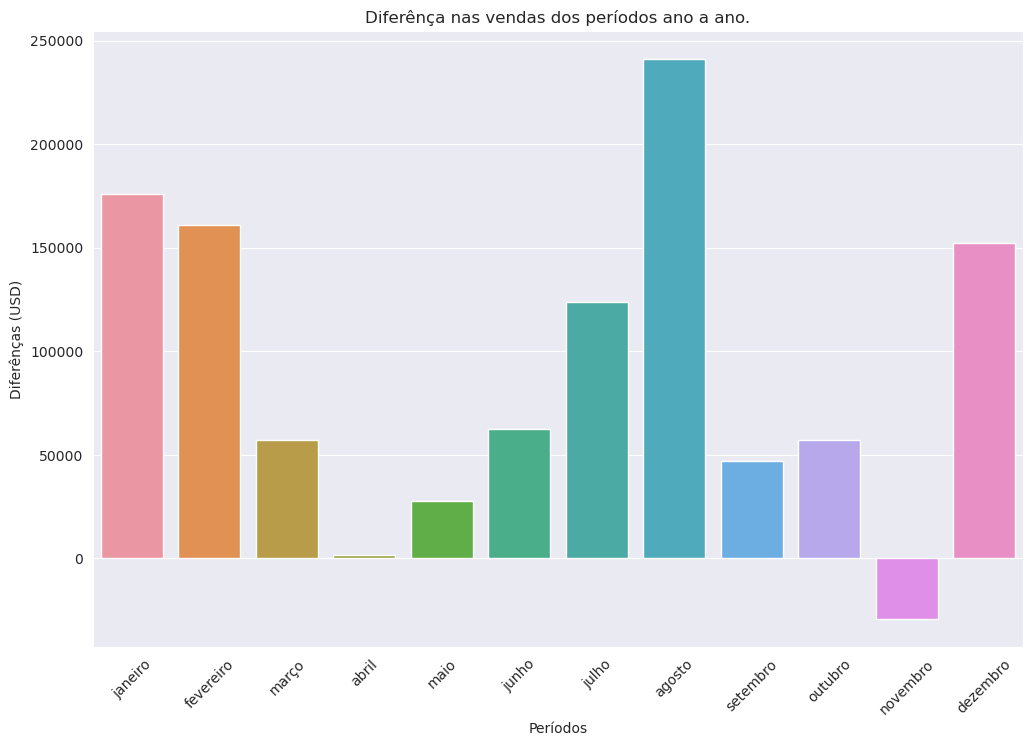

In [299]:
# Diferências ano a ano
plt.figure(figsize=FIGSIZE_DEFAULT)
sns.barplot(data=differencas, x=differencas['periodo'], y=differencas['diff_val'])
plt.title("Diferênça nas vendas dos períodos ano a ano.")
plt.xticks(rotation=45)
plt.xlabel("Períodos")
plt.ylabel("Diferênças (USD)")
plt.show()

## Vendas por localização países/cidades

In [300]:
# Consulta por localização
df3 = query('''SELECT o.orderDate, 
		o2.quantityOrdered, o2.priceEach, (o2.quantityOrdered * o2.priceEach) as totalLine,
		c.customerName, c.city  as customerCity, c.country as customerCountry, 
		CONCAT(e.firstName, " ", e.lastName) as employeeName, e.jobTitle, e.reportsTo,  
		o3.city as officeCity, o3.country as officeCountry, o3.territory 
	from orders o 
	join orderdetails o2 on o2.orderNumber = o.orderNumber 
	join customers c on c.customerNumber = o.customerNumber 
	join employees e on e.employeeNumber = c.salesRepEmployeeNumber 
	join offices o3 on o3.officeCode = e.officeCode 
	where o.status = 'Shipped'
''')
	

(2771, 13)

,orderDate,quantityOrdered,priceEach,totalLine,customerName,customerCity,customerCountry,employeeName,jobTitle,reportsTo,officeCity,officeCountry,territory
0,2003-01-06,30,136.00,4080.00,Online Diecast Creations Co.,Nashua,USA,Steve Patterson,Sales Rep,1143,Boston,USA,NA
1,2003-01-06,50,55.09,2754.50,Online Diecast Creations Co.,Nashua,USA,Steve Patterson,Sales Rep,1143,Boston,USA,NA
2,2003-01-06,22,75.46,1660.12,Online Diecast Creations Co.,Nashua,USA,Steve Patterson,Sales Rep,1143,Boston,USA,NA
3,2003-01-06,49,35.29,1729.21,Online Diecast Creations Co.,Nashua,USA,Steve Patterson,Sales Rep,1143,Boston,USA,NA
4,2003-01-09,25,108.06,2701.50,"Blauer See Auto, Co.",Frankfurt,Germany,Barry Jones,Sales Rep,1102,London,UK,EMEA


### Vendas por territórios

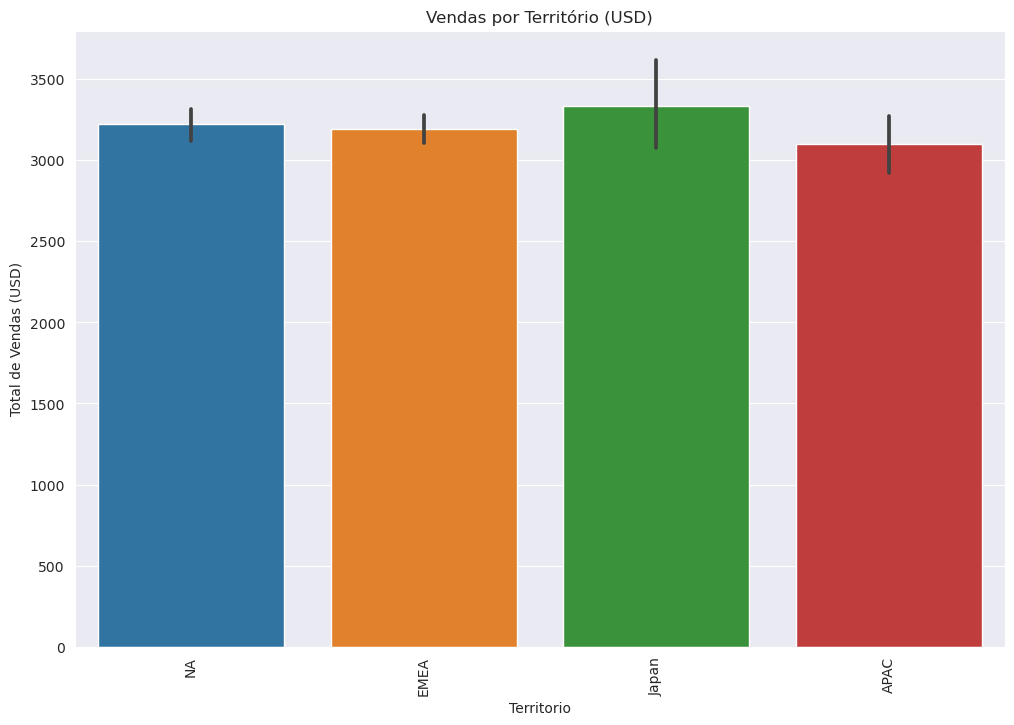

In [301]:
# vendas por território
plt.figure(figsize=FIGSIZE_DEFAULT)
sns.barplot(data=df3, x='territory', y='totalLine')
plt.title("Vendas por Território (USD)")
plt.xticks(rotation=90)
plt.xlabel("Territorio")
plt.ylabel("Total de Vendas (USD)")
plt.show()

In [302]:
# vendas por pais (lojas)
paises = df3.groupby('officeCountry')['totalLine'].sum() \
    .sort_values(ascending=False).reset_index()
paises


,officeCountry,totalLine
0,USA,3238116.12
1,France,2812295.95
2,UK,1324325.90
3,Australia,1033246.60
4,Japan,457110.07


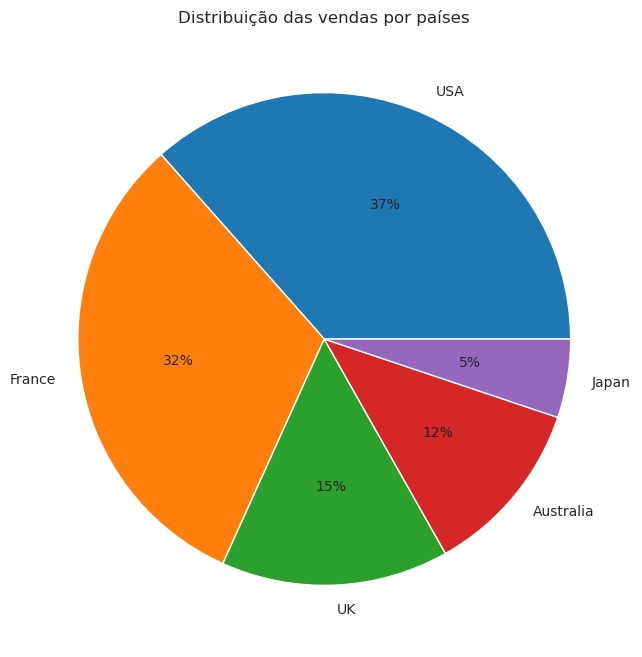

In [303]:
# Distribuição por países
plt.figure(figsize=FIGSIZE_DEFAULT)
plt.pie(x=paises['totalLine'], \
        labels=paises['officeCountry'], \
        autopct='%.0f%%')
plt.title('Distribuição das vendas por países')
plt.show()


### Vendas por cidades

In [304]:
# vendas por pais/cidade
cidades = {}
for country in paises.officeCountry.unique():
    cidades[country] = df3.where(df3['officeCountry'] == country) \
        .groupby('officeCity')['totalLine'].sum() \
        .sort_values(ascending=False).reset_index()

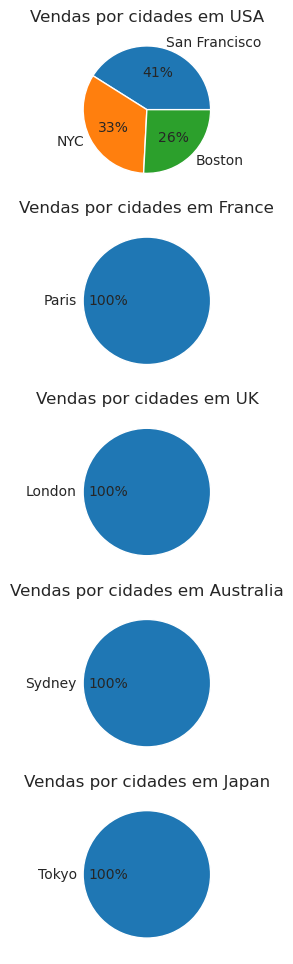

In [305]:
# Apresentação de vendas por países e cidades (embora apenas USA possui mais de uma cidade)
fig, ax = plt.subplots(5,1, figsize=(16,12))

for n, country in enumerate(cidades.keys()):
    plt.subplot(5, 1, n+1)
    plt.pie(x=cidades[country]['totalLine'], \
            labels=cidades[country]['officeCity'], \
            autopct="%.0f%%")
    plt.title(f"Vendas por cidades em {country}")


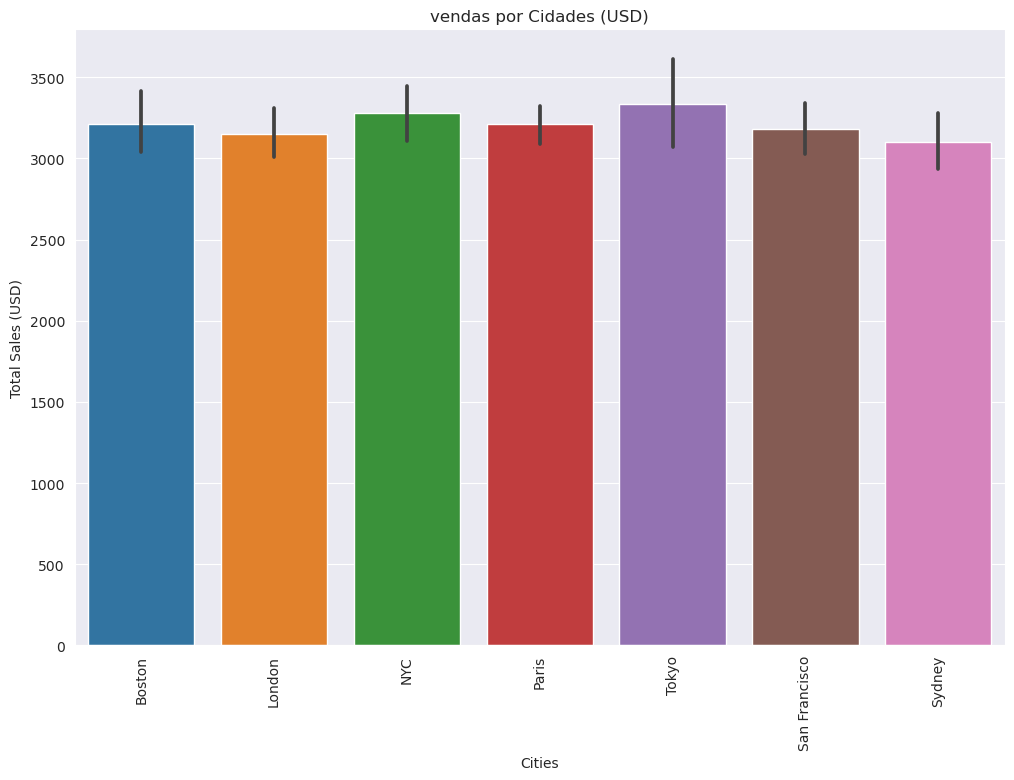

In [306]:
plt.figure(figsize=FIGSIZE_DEFAULT)
sns.barplot(data=df3, x='officeCity', y='totalLine')
plt.title("vendas por Cidades (USD)")
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.ylabel("Total Sales (USD)")
plt.show()

## Vendas por funcionários (representantes)

In [307]:
# Maiores vendedores da companhia
maiores_vendedores = df3.groupby('employeeName')['totalLine'].sum().sort_values(ascending=False).reset_index().head(10)
maiores_vendedores

,employeeName,totalLine
0,Gerard Hernandez,1065035.29
1,Leslie Jennings,1021661.89
2,Pamela Castillo,790297.44
3,Larry Bott,686653.25
4,Barry Jones,637672.65
5,George Vanauf,584406.80
6,Loui Bondur,569485.75
7,Peter Marsh,523860.78
8,Andy Fixter,509385.82
9,Foon Yue Tseng,488212.67


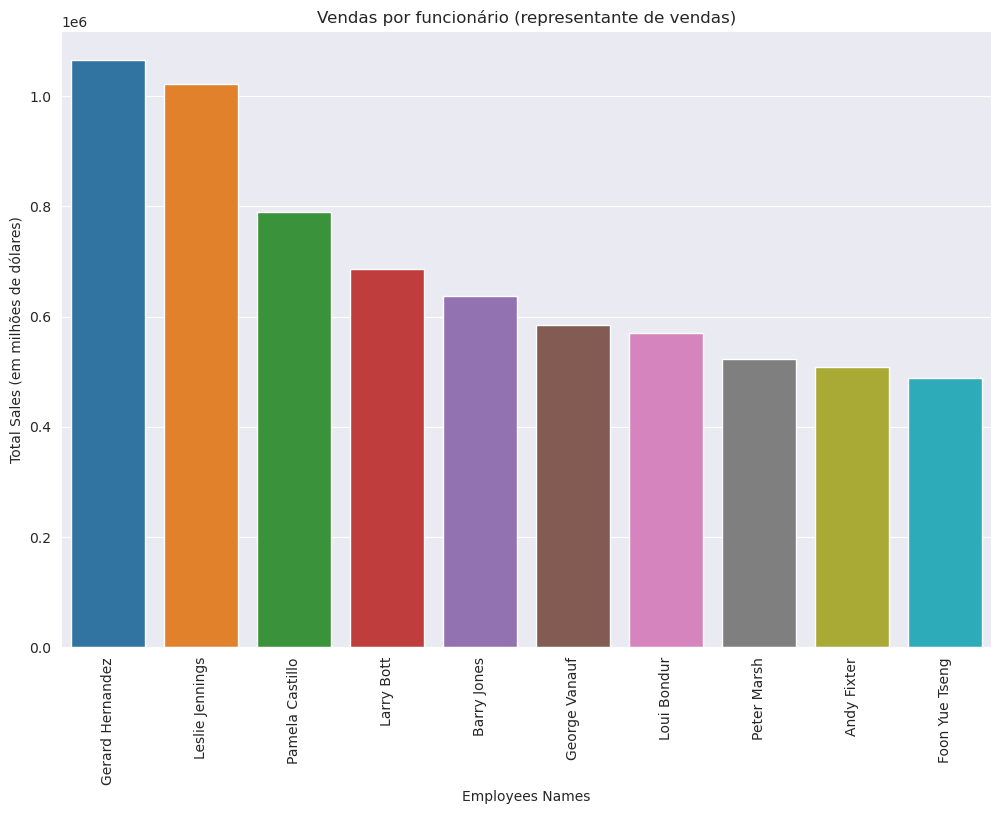

In [308]:
plt.figure(figsize=FIGSIZE_DEFAULT)
sns.barplot(data=maiores_vendedores, x='employeeName', y='totalLine', errorbar=None)
plt.title("Vendas por funcionário (representante de vendas)")
plt.xticks(rotation=90)
plt.xlabel("Employees Names")
plt.ylabel("Total Sales (em milhões de dólares)")
plt.show()